# Objective: Develop a machine learning model which can accurately predict online fraudulent transection from a large volume of financial data and distinguish between legitimate and suspecious transection.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Money Laundering.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# The dataset have these columns –
# Feature	Description
# -------------------------------------------------
# 1. step	----> tells about the unit of time
# 2. type	----> type of transaction done
# 3. amount	----> the total amount of transaction
# 4. nameOrg -----> account that starts the transaction
# 5. oldbalanceOrg	-----> Balance of the account of sender before transaction
# 6. newbalanceOrg	-----> Balance of the account of sender after transaction
# 7. nameDest	--------> account that receives the transaction
# 8. oldbalanceDest	------> Balance of the account of receiver before transaction
# 9. newbalanceDest	-------> Balance of the account of receiver after transaction
# 10. isFraud	--------> The value to be predicted i.e. 0 or 1
# 11. isFlaggedFraud	-------> Transection amount more than 200000 is FlaggedFraud ie 1 else 0

In [ ]:
# Taking sample of 500000 data for analying and building model
data = df.sample(n=500000, ignore_index=True)
data['isFraud'].value_counts()

isFraud
0    499367
1       633
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [ ]:
# Checking for any missing value:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Checking for any dublicate value
data.duplicated().sum()

0

In [ ]:
# Descriptive Stats:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000
mean,243.554092,1.805431e+05,8.342159e+05,8.554064e+05,1.101888e+06,1.226111e+06,0.001266,0.000002
std,142.103645,6.106659e+05,2.900202e+06,2.935585e+06,3.417176e+06,3.681684e+06,0.035558,0.001414
min,1.000000,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.333934e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.454315e+04,1.417850e+04,0.000000e+00,1.307052e+05,2.133784e+05,0.000000,0.000000
75%,334.000000,2.083557e+05,1.068054e+05,1.434770e+05,9.383464e+05,1.104543e+06,0.000000,0.000000
max,741.000000,6.173376e+07,3.729746e+07,3.753800e+07,2.772997e+08,2.916677e+08,1.000000,1.000000


In [ ]:
# Data types
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [ ]:
# Segregating dtypes from data
object_list = data.dtypes[data.dtypes == 'object'].index.tolist()
integer_list = data.dtypes[data.dtypes == 'int64'].index.tolist()
float_list = data.dtypes[data.dtypes == 'float64'].index.tolist()

print("Categorical_Variable:   ", object_list)
print("Integer_Variable    :   ", integer_list)
print("Float_Variable      :   ", float_list)

Categorical_Variable:    ['type', 'nameOrig', 'nameDest']
Integer_Variable    :    ['step', 'isFraud', 'isFlaggedFraud']
Float_Variable      :    ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


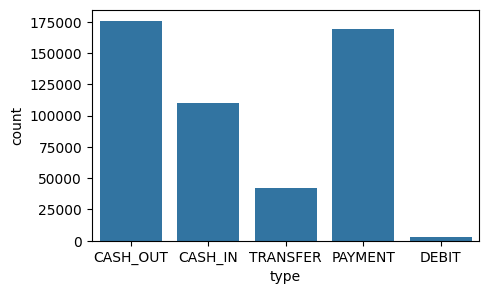

'Insight-1: PAYMENT & CASH_OUT have maximum transections in dataset.'

In [ ]:
# Let’s see the count plot of the Payment type column using Seaborn library.
plt.figure(figsize=(5,3))
sns.countplot(x='type', data=data)
plt.show()
"""Insight-1: PAYMENT & CASH_OUT have maximum transections in dataset."""

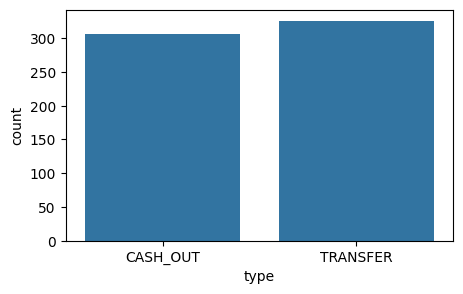

' Insight-2: All fraudulant transection are occured in payment type TRANSFER & CASH_OUT.'

In [ ]:
# Analysing the Froud Transection
df1 = data[data['isFraud']==1]     # Creating dataframe with all fraudulent transection.

plt.figure(figsize=(5,3))
sns.countplot(x='type', data=df1)
plt.show()

""" Insight-2: All fraudulant transection are occured in payment type TRANSFER & CASH_OUT."""

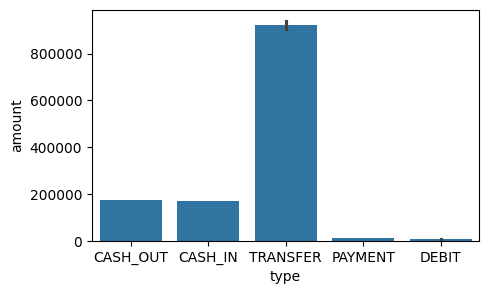

'TRANSFER has maximum amount of transection record in overall dataset.'

In [ ]:
# Analysing the amount on the basis of transection type on overall data.
plt.figure(figsize=(5,3))
sns.barplot(x='type', y='amount', data=data)
plt.show()

"""TRANSFER has maximum amount of transection record in overall dataset."""

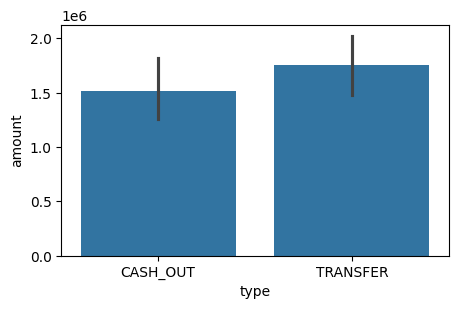

'TRANSFER & CASH_OUT have maximum amount transection record in fraudulant transection'

In [ ]:
# Analysing the amount on the basis of transection type on fraudulant transection.
plt.figure(figsize=(5,3))
sns.barplot(x='type', y='amount', data=df1)
plt.show()
"""TRANSFER & CASH_OUT have maximum amount transection record in fraudulant transection"""

## Visualising the data.

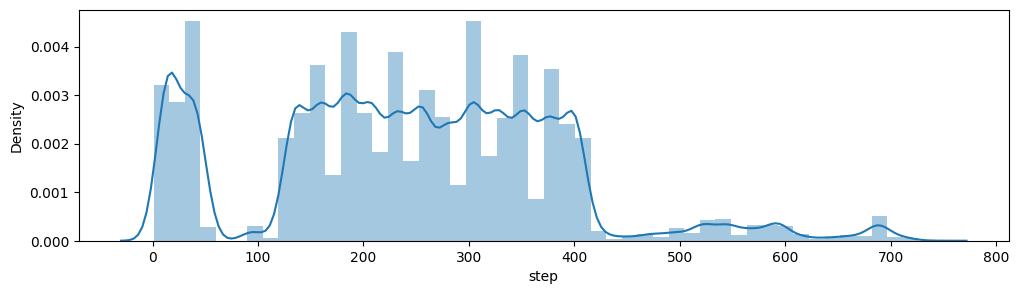

In [ ]:
# Now let’s see the distribution of the step column using distplot.
plt.figure(figsize=(12, 3))
sns.distplot(data['step'], bins=50)
plt.show()

In [ ]:
print(float_list, end='')

['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

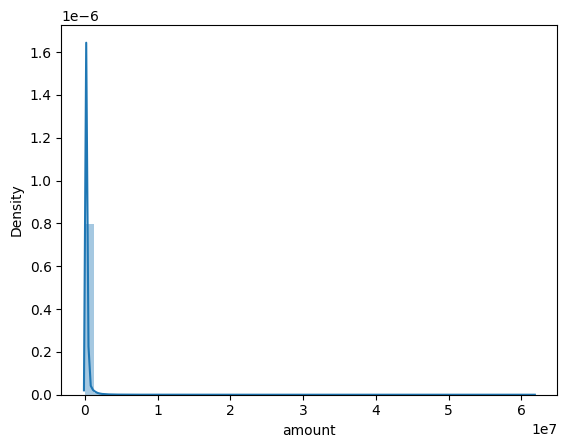

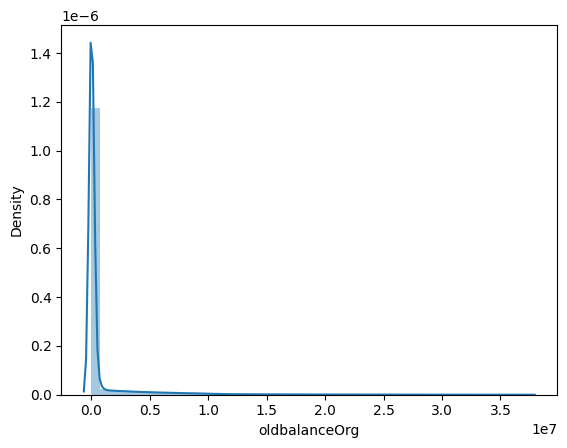

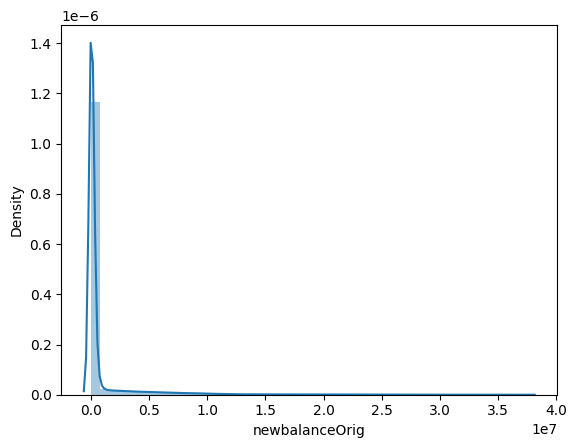

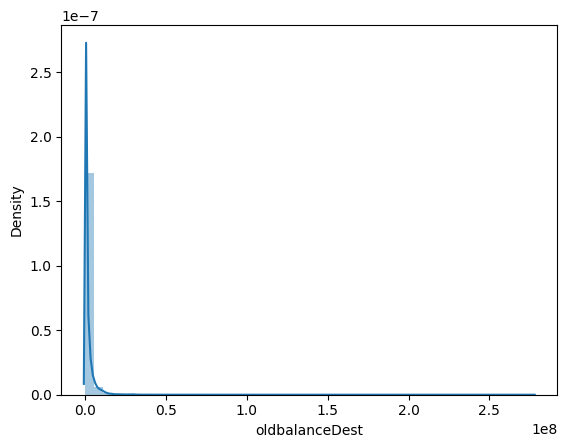

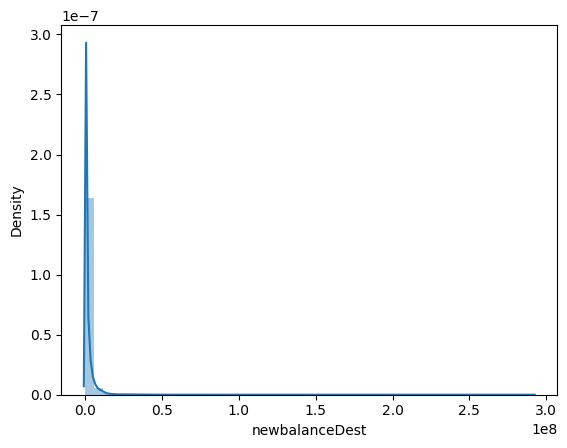

In [ ]:
# Finding the distribution of data based on distplot.

def distplot(col):
    sns.distplot(data[col], bins=50)
    plt.show()

for i in float_list:
    distplot(i)

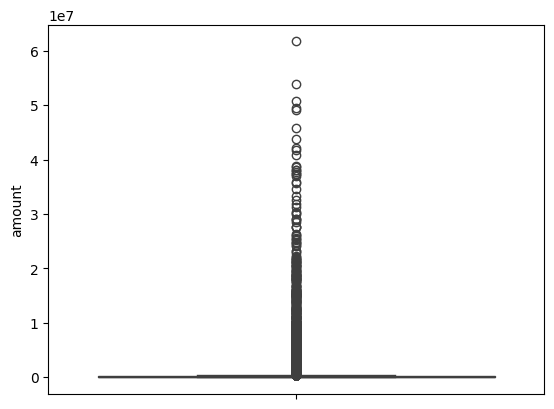

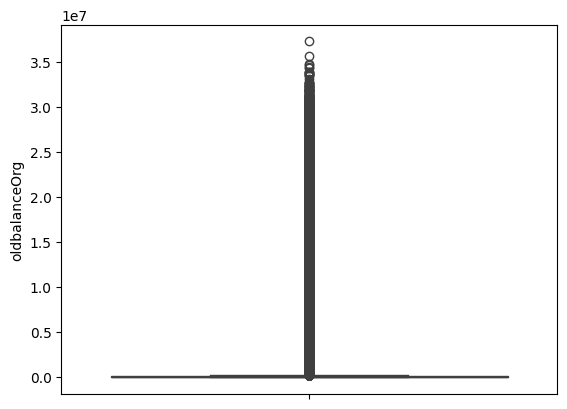

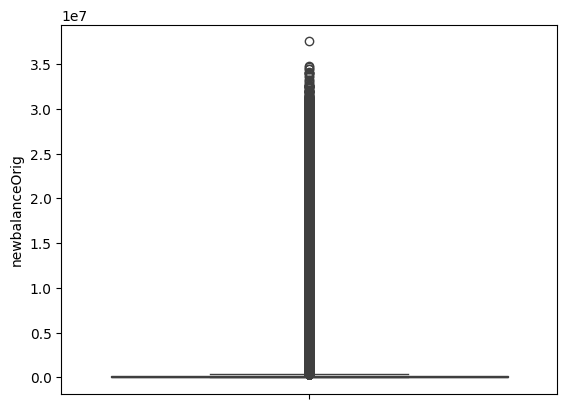

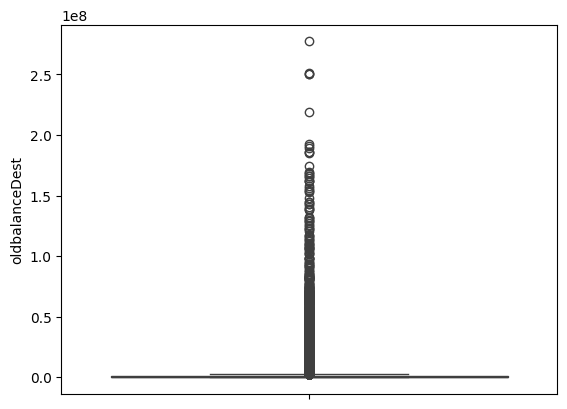

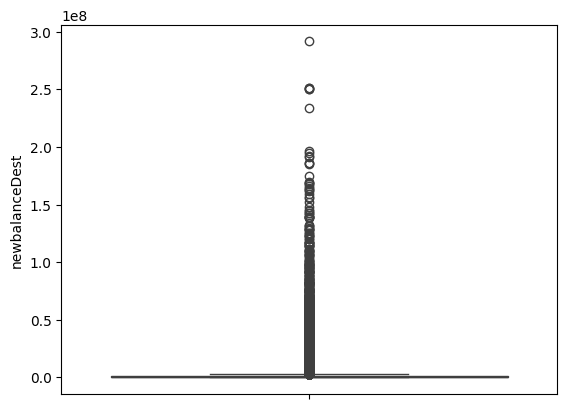

In [ ]:
# Finding the distribution of data based on boxplots.

def boxplot(col):
    sns.boxplot(data[col])
    plt.show()

for i in float_list:
    boxplot(i)

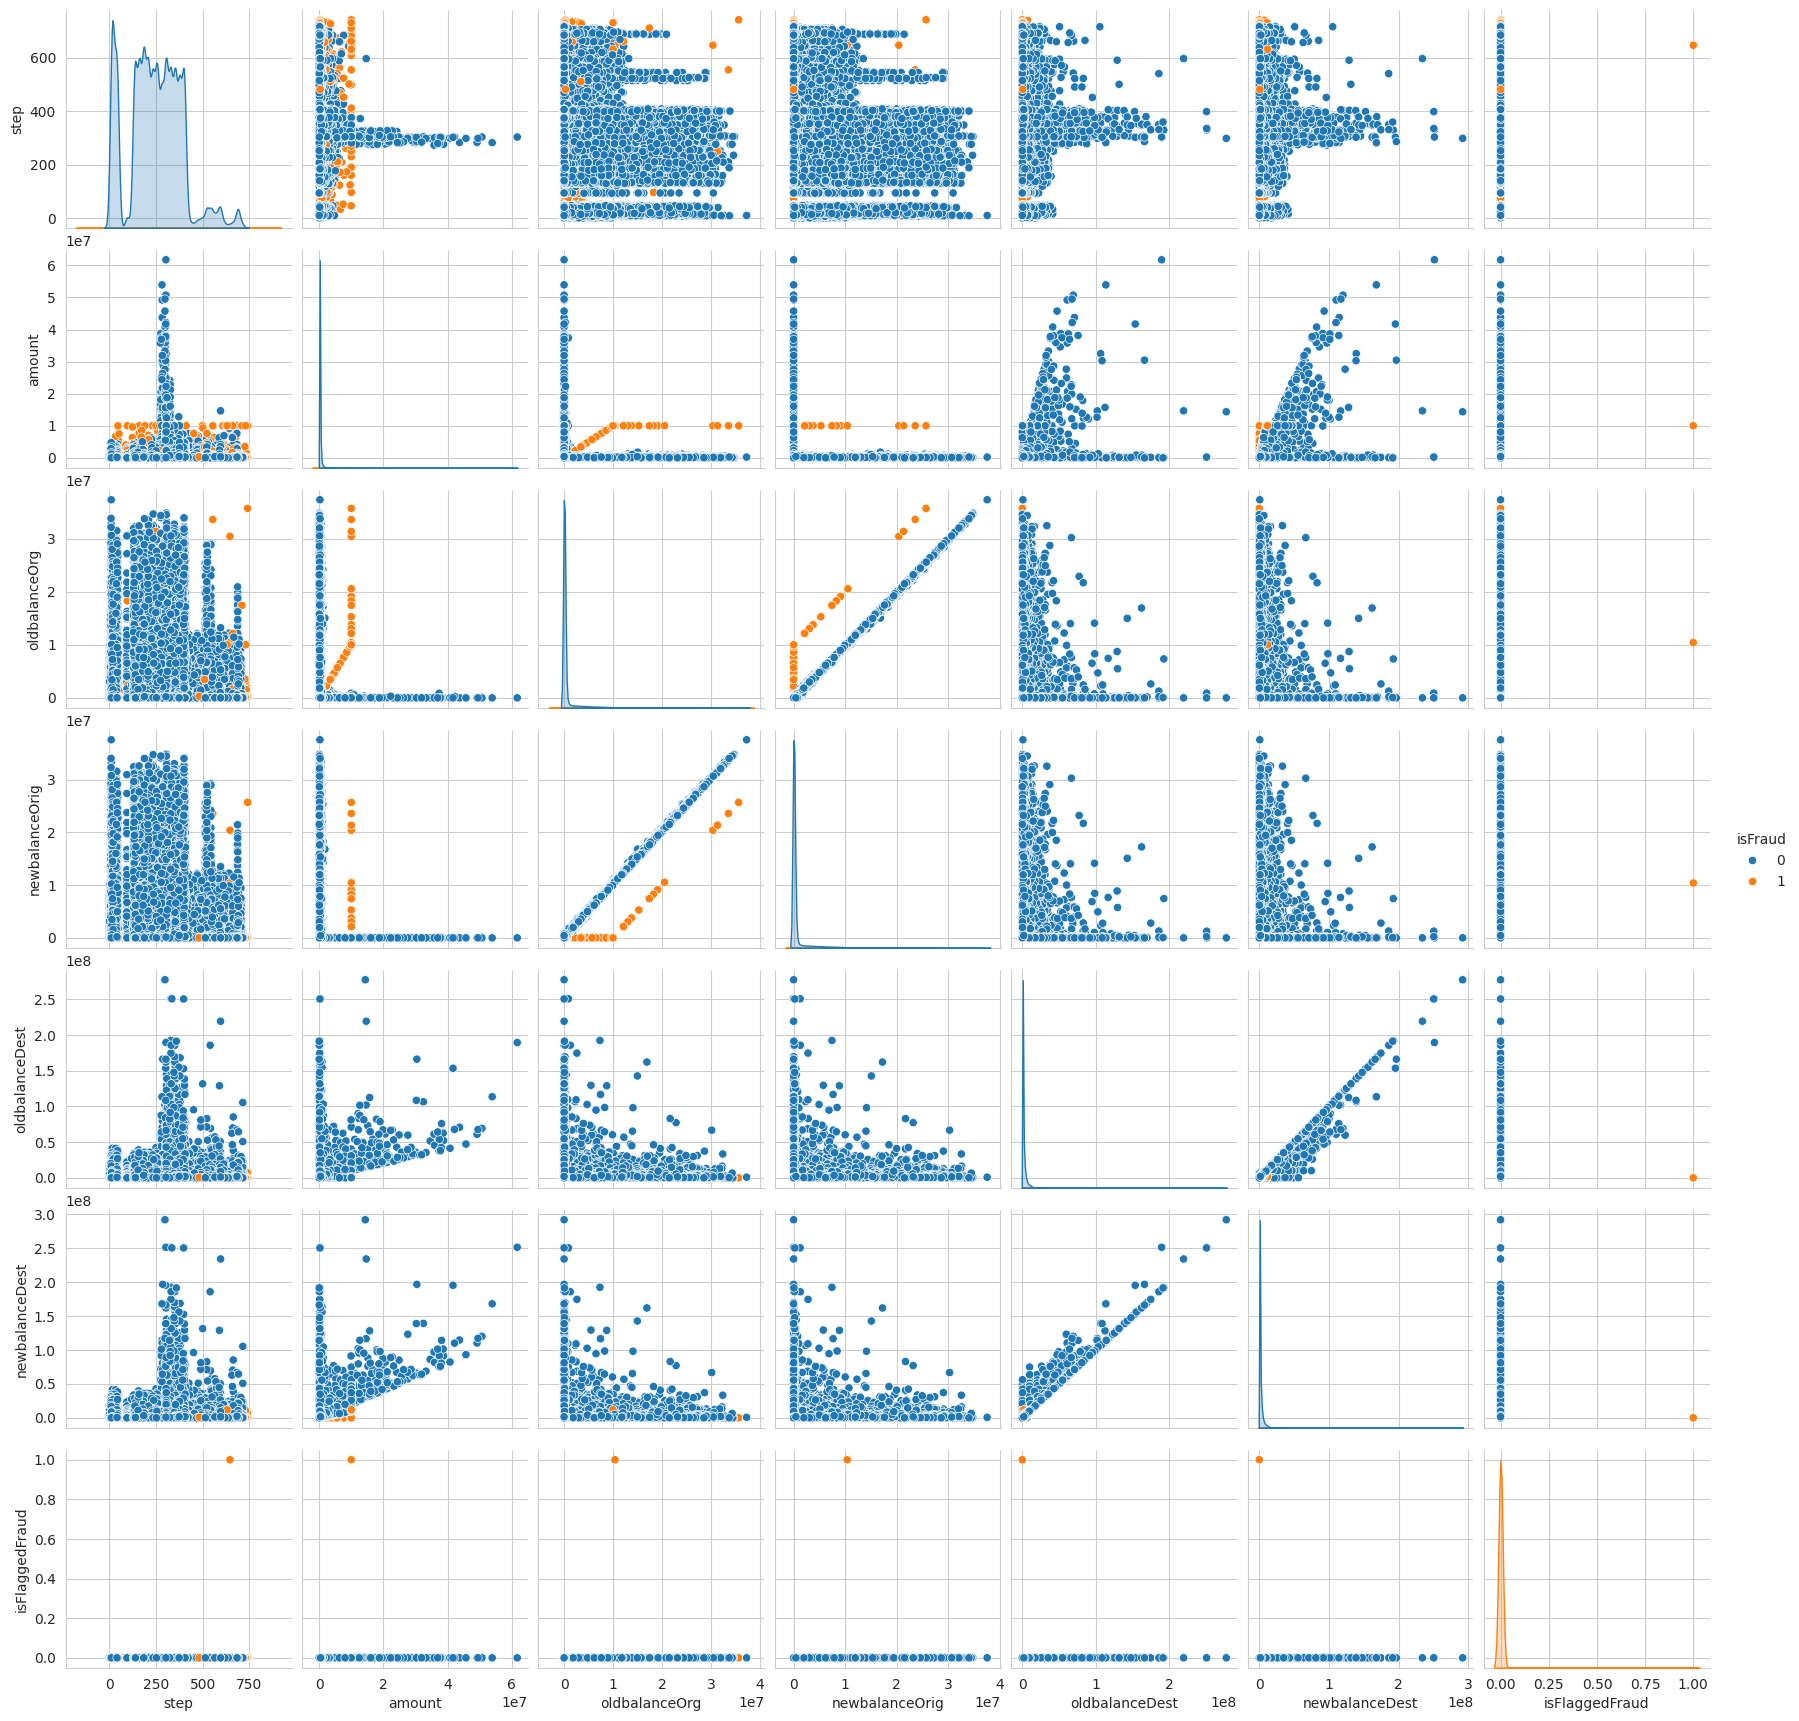

In [21]:
# Drawing pairwise plot to check any relation between two variables.

sns.set_style('whitegrid')
sns.pairplot(data=data, diag_kind='kde', hue='isFraud')
plt.show()

<Axes: >

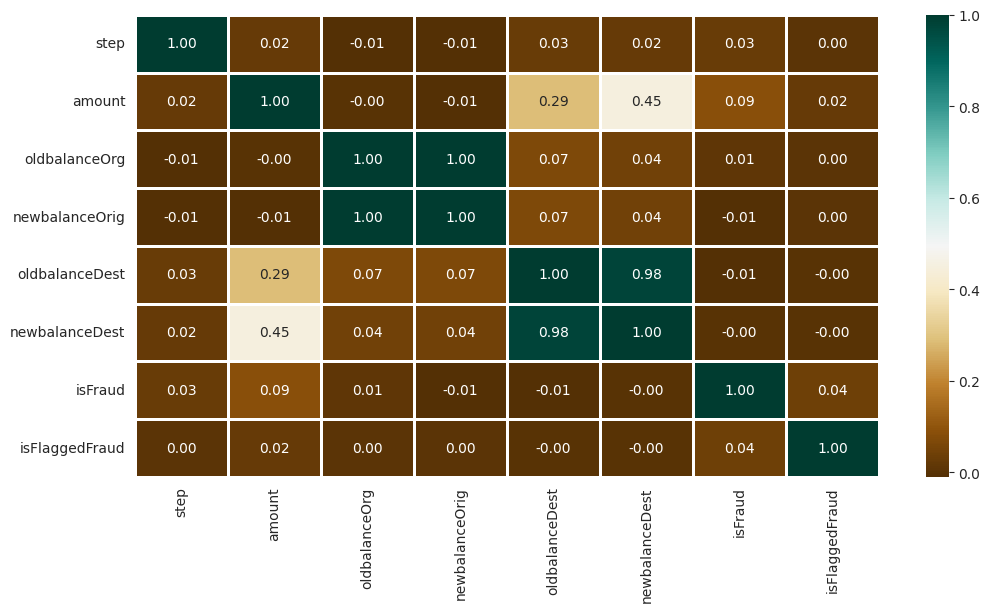

In [22]:
# Now, Let’s find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Data Preprocessing:

### Taking sample of 500000 data for ease.

In [23]:
data_sample = data.copy()
data_sample.shape

(500000, 11)

In [24]:
data_sample['isFraud'].value_counts()

isFraud
0    499367
1       633
Name: count, dtype: int64

In [25]:
# Now separting independent and dependent variables.
X = data_sample.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_sample['isFraud']

In [26]:
# Let’s check the shape of extracted data.
X.shape, y.shape

((500000, 8), (500000,))

In [27]:
# Checking for balance or imbalance datasets.
y.value_counts()

isFraud
0    499367
1       633
Name: count, dtype: int64

<Axes: >

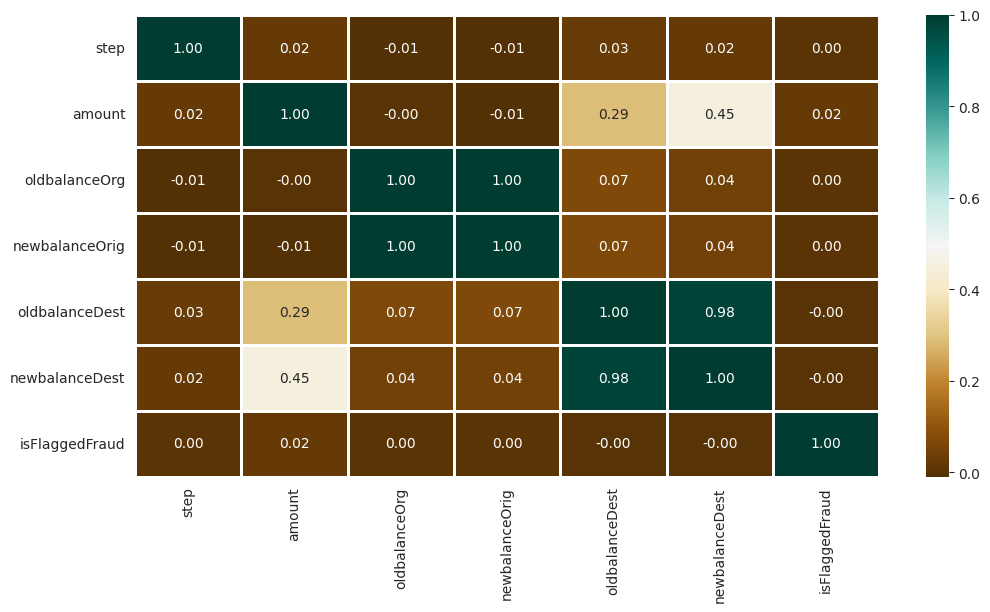

In [28]:
# Now, Let’s find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(numeric_only=True),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [29]:
# Dropping the columns which has high correlation such as oldbalanceOrg and oldbalanceDest.
X.drop(columns=['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [30]:
X.shape

(500000, 6)

In [31]:
X.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,44,CASH_OUT,542218.18,0.00,5143622.33,0
1,181,CASH_IN,539590.30,16217864.01,344682.43,0
2,137,TRANSFER,384102.53,0.00,859014.88,0
3,253,CASH_IN,175882.66,187582.66,3385703.32,0
4,15,PAYMENT,2106.92,0.00,0.00,0


In [32]:
type_new = pd.get_dummies(X['type'], drop_first=True, dtype=int)
X_new = pd.concat([X, type_new], axis=1)
X_new.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,44,CASH_OUT,542218.18,0.00,5143622.33,0,1,0,0,0
1,181,CASH_IN,539590.30,16217864.01,344682.43,0,0,0,0,0
2,137,TRANSFER,384102.53,0.00,859014.88,0,0,0,0,1
3,253,CASH_IN,175882.66,187582.66,3385703.32,0,0,0,0,0
4,15,PAYMENT,2106.92,0.00,0.00,0,0,0,1,0


In [33]:
X_new.drop(columns='type', axis=1, inplace=True)

In [34]:
X_new.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,44,542218.18,0.00,5143622.33,0,1,0,0,0
1,181,539590.30,16217864.01,344682.43,0,0,0,0,0
2,137,384102.53,0.00,859014.88,0,0,0,0,1
3,253,175882.66,187582.66,3385703.32,0,0,0,0,0
4,15,2106.92,0.00,0.00,0,0,0,1,0


In [35]:
# Lets make the label as balanced data sets
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [36]:
print(Counter(y))

Counter({0: 499367, 1: 633})


In [37]:
# Lets balance the label
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X_new,y)
print(Counter(y_ros))

Counter({0: 499367, 1: 499367})


In [38]:
# Scaling the X_new
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_ros)
y = y_ros

In [39]:
X_scaled=pd.DataFrame(x,columns=X_new.columns)
X_scaled.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.058108,0.008783,0.000000,0.017635,0.0,1.0,0.0,0.0,0.0
1,0.243243,0.008741,0.432039,0.001182,0.0,0.0,0.0,0.0,0.0
2,0.183784,0.006222,0.000000,0.002945,0.0,0.0,0.0,0.0,1.0
3,0.340541,0.002849,0.004997,0.011608,0.0,0.0,0.0,0.0,0.0
4,0.018919,0.000034,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


In [40]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(X_PCA.shape)

(998734, 9)
(998734, 4)


In [41]:
# Spliting the data into train_test_split for model building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=100,stratify=y)

In [42]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(798987, 4) (199747, 4) (798987,) (199747,)


In [43]:
print(Y_train.value_counts())
print('------------------------------')
print(Y_test.value_counts())

isFraud
1    399494
0    399493
Name: count, dtype: int64
------------------------------
isFraud
0    99874
1    99873
Name: count, dtype: int64


In [44]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
models.append(('Random Forest', RandomForestClassifier()))
# models.append(('Support Vector Machine', SVC()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('XGBClassifier', XGBClassifier()))

# Evaluate Each Model using Cross-Validation
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)  # 10-fold cross-validation
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')


Logistic Regression: Mean Accuracy = 0.7812, Std = 0.0011
Random Forest: Mean Accuracy = 0.9998, Std = 0.0000
K-Nearest Neighbors: Mean Accuracy = 0.9992, Std = 0.0001
Decision Tree: Mean Accuracy = 0.9997, Std = 0.0001
XGBClassifier: Mean Accuracy = 0.9726, Std = 0.0013


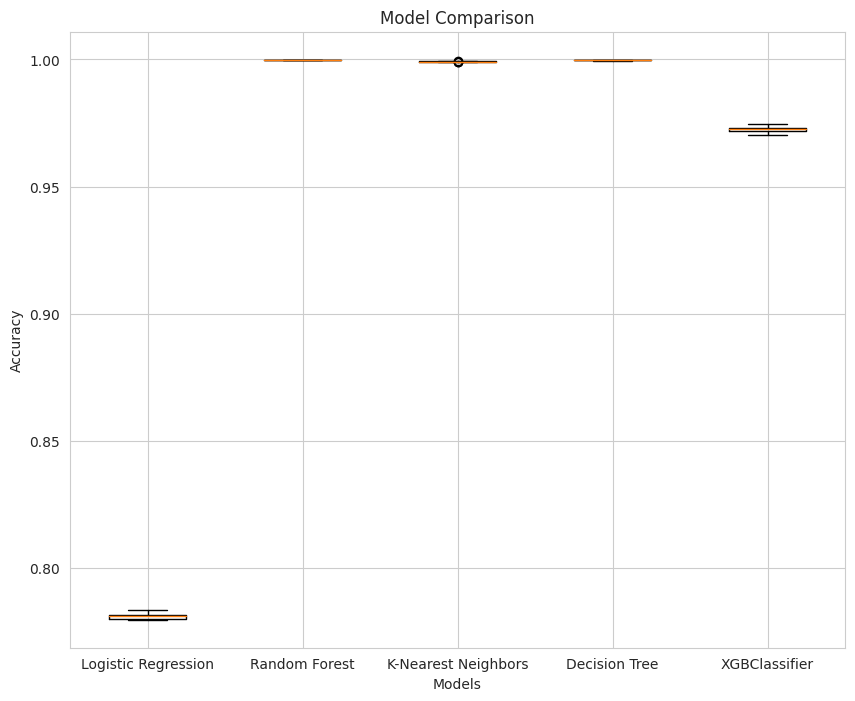

In [45]:
# Compare Models
# Plot the results
plt.figure(figsize=(10, 8))
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Train the RandomForestClassifier with Training Data and Evaluate on Test Data
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)
rfc_model

RandomForestClassifier()

In [47]:
y_pred1 = rfc_model.predict(X_test)
accuracy1 = accuracy_score(Y_test, y_pred1)
print('Model_Accuracy_RandomForestClassifier:', accuracy1)
print()
print('---------------------------------'*3)
print('Classification_Report')
print()
print(classification_report(Y_test, y_pred1))

Model_Accuracy_RandomForestClassifier: 0.9997396706834145

---------------------------------------------------------------------------------------------------
Classification_Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99874
           1       1.00      1.00      1.00     99873

    accuracy                           1.00    199747
   macro avg       1.00      1.00      1.00    199747
weighted avg       1.00      1.00      1.00    199747



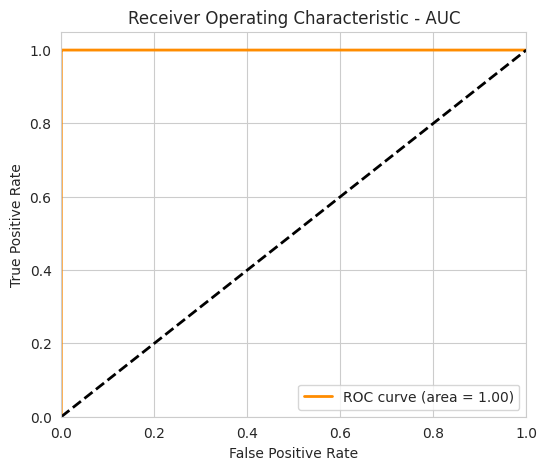

In [48]:
# Plot AUC-ROC for rfc_model:
y_score1 = rfc_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_score1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AUC')
plt.legend(loc="lower right")
plt.show()

In [49]:
confusion_matrix(Y_test, y_pred1)

array([[99822,    52],
       [    0, 99873]])

Note:
- Type-1 Error: There are 35 transection which model has predicted as Fraud transection, which is actually not a fraud transection.
- Type-2 Error: There is 0 FN, False Negative which means model has 100% correctly predicted all fraudulent transection so there is no misclassification.

Conclusion:
----------------
As our target is to detect all the trasection that are fraudulent and potential treat for money loss, so here our RandomForest Classifier is predicting approximate 100% accurate on class 1, ie fraudulent transection.


--------------------------------- End of Program ------------------------------